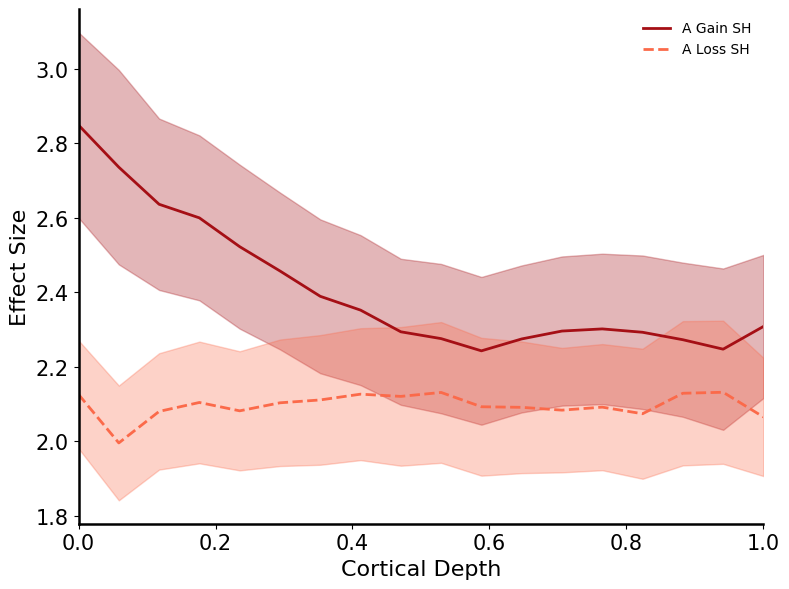

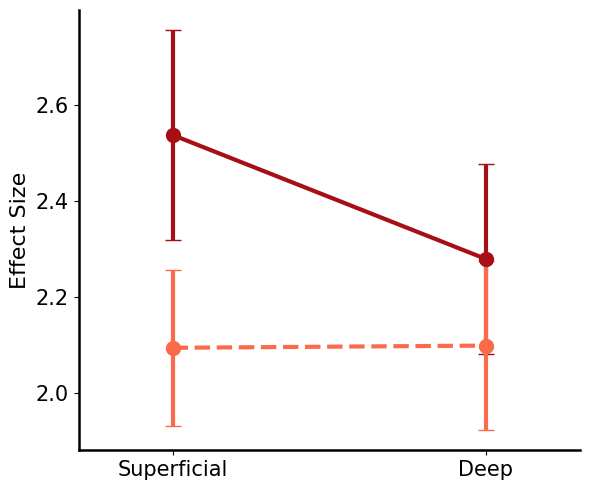


RM-ANOVA (Valence × Depth) from source file:
          Effect   F Value  Num DF  Den DF    Pr > F
0        Valence  1.451717       1      19  0.243046
1          Depth  3.901735       1      19  0.062946
2  Valence:Depth  5.889481       1      19  0.025348


In [ ]:
# %% Load source data (Fig 7) and reproduce laminar profile + superficial/deep plot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

roi_tag = "vPFC"  # match what you saved
in_xlsx = os.path.join(data_dir, "output", f"SourceData_Fig7_{roi_tag}_gainloss_laminar.xlsx")

df_gain = pd.read_excel(in_xlsx, sheet_name="A_Gain_Layers")
df_loss = pd.read_excel(in_xlsx, sheet_name="A_Loss_Layers")
df_dep  = pd.read_excel(in_xlsx, sheet_name="Depth")
df_sd   = pd.read_excel(in_xlsx, sheet_name="SupDeep_Subject")
df_anv  = pd.read_excel(in_xlsx, sheet_name="ANOVA_RM")

layer_cols = [c for c in df_gain.columns if c.startswith("L")]
depth = df_dep["CorticalDepth"].to_numpy(dtype=float)

gain_all = df_gain[layer_cols].to_numpy(dtype=float)
loss_all = df_loss[layer_cols].to_numpy(dtype=float)

# mean/SEM across subjects (layer-wise)
def mean_sem(mat):
    m = np.nanmean(mat, axis=0)
    n = np.sum(np.isfinite(mat), axis=0)
    se = np.nanstd(mat, axis=0, ddof=1) / np.sqrt(np.maximum(n, 1))
    se[n < 2] = np.nan
    return m, se

gain_mean, gain_sem = mean_sem(gain_all)
loss_mean, loss_sem = mean_sem(loss_all)

# Blue palette (e.g., Outcome Gain vs Loss)
BLUE_DARK  = "#1f77b4"   # deep blue
BLUE_LIGHT = "#6baed6"   # light blue

# Red palette (e.g., Outcome Gain vs Loss)
RED_DARK  = "#a50f15"   # deep burgundy
RED_LIGHT = "#fb6a4a"   # light red-orange (still reads as red)

color1 = RED_DARK
color2 = RED_LIGHT

# ---------------------------
# Plot 1: Laminar profile
# ---------------------------
fig, ax = plt.subplots(figsize=(8, 6))

ax.fill_between(depth, gain_mean - gain_sem, gain_mean + gain_sem, color=color1, alpha=0.3)
ax.plot(depth, gain_mean, linewidth=2, color=color1, label="A Gain SH")

ax.fill_between(depth, loss_mean - loss_sem, loss_mean + loss_sem, color=color2, alpha=0.3)
ax.plot(depth, loss_mean, linewidth=2, color=color2, linestyle="--", label="A Loss SH")

ax.set_xlabel("Cortical Depth", fontsize=16)
ax.set_ylabel("Effect Size", fontsize=16)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.set_xlim([0, 1])
ax.legend(frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.8)
ax.spines["bottom"].set_linewidth(1.8)

plt.tight_layout()
out1 = os.path.join(data_dir, "output", f"Fig7_{roi_tag}_layerprofile_from_source.png")
plt.savefig(out1, dpi=300, bbox_inches="tight")
plt.show()

# ---------------------------
# Plot 2: Superficial vs Deep
# ---------------------------
gain_sup  = df_sd["A_Gain_SH_Superficial"].to_numpy(dtype=float)
gain_deep = df_sd["A_Gain_SH_Deep"].to_numpy(dtype=float)
loss_sup  = df_sd["A_Loss_SH_Superficial"].to_numpy(dtype=float)
loss_deep = df_sd["A_Loss_SH_Deep"].to_numpy(dtype=float)

means = [
    [np.nanmean(gain_sup), np.nanmean(gain_deep)],
    [np.nanmean(loss_sup), np.nanmean(loss_deep)],
]
sems = [
    [np.nanstd(gain_sup, ddof=1)/np.sqrt(np.isfinite(gain_sup).sum()),
     np.nanstd(gain_deep, ddof=1)/np.sqrt(np.isfinite(gain_deep).sum())],
    [np.nanstd(loss_sup, ddof=1)/np.sqrt(np.isfinite(loss_sup).sum()),
     np.nanstd(loss_deep, ddof=1)/np.sqrt(np.isfinite(loss_deep).sum())],
]

x = np.arange(2)
x_labels = ["Superficial", "Deep"]

fig, ax = plt.subplots(figsize=(6, 5))
ax.errorbar(x, means[0], yerr=sems[0], marker="o", linewidth=3, markersize=10, capsize=6, color=color1, label="A Gain SH")
ax.errorbar(x, means[1], yerr=sems[1], marker="o", linewidth=3, markersize=10, capsize=6, linestyle="--", color=color2, label="A Loss SH")

ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=16)
ax.set_ylabel("Effect Size", fontsize=16)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.set_xlim(-0.3, 1.3)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.8)
ax.spines["bottom"].set_linewidth(1.8)

plt.tight_layout()
out2 = os.path.join(data_dir, "output", f"Fig7_{roi_tag}_supdeep_from_source.png")
plt.savefig(out2, dpi=300, bbox_inches="tight")
plt.show()

print("\nRM-ANOVA (Valence × Depth) from source file:")
print(df_anv)